In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
#import xgboost as xgb
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
%matplotlib inline
from sklearn.model_selection import KFold, cross_val_score

In [2]:
conda install -c conda-forge xgboost

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [3]:
import xgboost as xgb

/Users/manvimahajan/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [4]:
train = pd.read_csv(r'train.csv')
test = pd.read_csv(r'test.csv')

In [5]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [7]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],test.loc[:,'MSSubClass':'SaleCondition']))

In [8]:
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [9]:
# model regression . fit
# model lasso . fit

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'log(price + 1)'}>]], dtype=object)

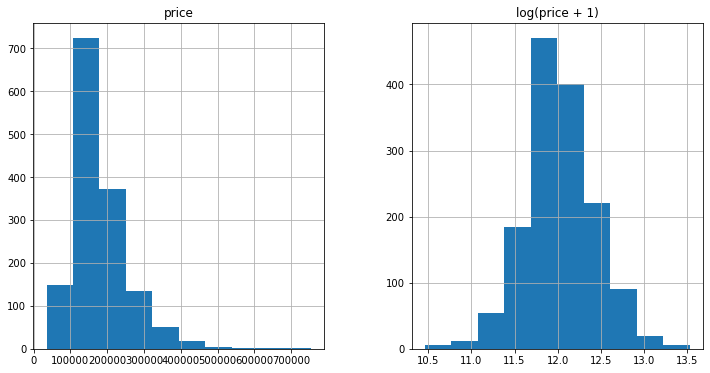

In [10]:
#features more normal
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

In [11]:
train["SalePrice"] = np.log1p(train["SalePrice"])

In [12]:
train["SalePrice"] #define target

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [13]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

In [14]:
numeric_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [15]:
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [16]:
all_data[skewed_feats]

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,BsmtHalfBath,KitchenAbvGr,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,4.110874,4.189655,9.042040,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,...,7.444833,0.000000,0.693147,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000
1,3.044522,4.394449,9.169623,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,...,7.141245,0.693147,0.693147,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000
2,4.110874,4.234107,9.328212,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,...,7.488294,0.000000,0.693147,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000
3,4.262680,4.110874,9.164401,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,6.629363,...,7.448916,0.000000,0.693147,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000
4,4.110874,4.442651,9.565284,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,...,7.695758,0.000000,0.693147,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5.081404,3.091042,7.568896,0.000000,0.000000,0.0,6.304449,6.304449,6.304449,6.304449,...,6.996681,0.000000,0.693147,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
1455,5.081404,3.091042,7.546974,0.000000,5.533389,0.0,5.686975,6.304449,6.304449,6.304449,...,6.996681,0.000000,0.693147,0.000000,3.218876,0.000000,0.0,0.0,0.0,0.000000
1456,3.044522,5.081404,9.903538,0.000000,7.110696,0.0,0.000000,7.110696,7.110696,0.000000,...,7.110696,0.000000,0.693147,6.163315,0.000000,0.000000,0.0,0.0,0.0,0.000000
1457,4.454347,4.143135,9.253591,0.000000,5.823046,0.0,6.356108,6.816736,6.878326,0.000000,...,6.878326,0.693147,0.693147,4.394449,3.496508,0.000000,0.0,0.0,0.0,6.552508


In [17]:
all_data = pd.get_dummies(all_data)

In [18]:
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [19]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [20]:
all_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5.081404,3.091042,7.568896,4,7,1970,1970,0.000000,0.000000,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,5.081404,3.091042,7.546974,4,5,1970,1970,0.000000,5.533389,0.0,...,0,0,0,1,1,0,0,0,0,0
1456,3.044522,5.081404,9.903538,5,7,1960,1996,0.000000,7.110696,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,4.454347,4.143135,9.253591,5,5,1992,1992,0.000000,5.823046,0.0,...,0,0,0,1,0,0,0,0,1,0


In [21]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [22]:
model_ridge = Ridge()

In [23]:
model_ridge

Ridge()

In [24]:
alphas=[0.1] 
cv_ridge = [rmse_cv(Ridge(alpha =alpha)).mean() 
            for alpha in alphas]

## RMSE Value - Ridge

In [25]:
cv_ridge

[0.13777538277187865]

## RMSE Value - Lasso

In [26]:
model_lasso = LassoCV(alphas = [0.1]).fit(X_train, y)

In [27]:
rmse_cv(model_lasso).mean()

0.20921930047608214

### Observed that ridge performed better for alpha

### Optimizing Alpha 

In [51]:
# For Ridge
alphas=np.arange(5, 15, 1).tolist() #running on alpha from 5 to 15 at a 1 point interval
cv_ridge = [rmse_cv(Ridge(alpha =alpha)).mean() 
            for alpha in alphas]

In [52]:
min_index=cv_ridge.index(min(cv_ridge)) #min cv see for index
cv_ridge[min_index] #this is minimum cv score we could achieve 

0.12462456247627858

In [53]:
alphas[min_index] #min CV achieved at alpha = 10

11

In [54]:
# For Lasso
alphas=np.arange(0, 0.001, 0.0001).tolist() #running on alpha from 0 to 0.001 at a 0.0001 point interval
lasso_cv=[]
alpha_curr=[]
for i in alphas:
    model_lasso_cv = rmse_cv(LassoCV(alphas=[i]).fit(X_train, y)).mean()
    alpha_curr.append(i)
    lasso_cv.append(model_lasso_cv)

/Users/manvimahajan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/manvimahajan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.859303278561697, tolerance: 0.018912592760396085
  model = cd_fast.enet_coordinate_descent_gram(
/Users/manvimahajan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/manvimahajan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You mig

In [55]:
min_index=lasso_cv.index(min(lasso_cv)) #min cv see for index
lasso_cv[min_index] #this is minimum cv score we could achieve with lasso

0.10675721697744578

In [56]:
alpha_curr[min_index] #min CV achieved at alpha = 0.0005

0.0009000000000000001

Text(0, 0.5, 'rmse')

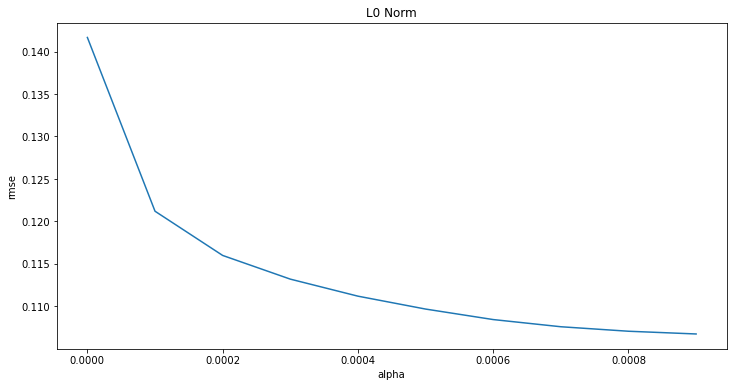

In [57]:
#L0 Norm of the coefficients that lasso produces
lasso_cv = pd.Series(lasso_cv, index = alphas)
lasso_cv.plot(title = "L0 Norm")
plt.xlabel("alpha")
plt.ylabel("rmse")

### For Ridge, we were able to optimize alpha = 10, to get RMSE CV score of 0.127
### For Lasso, alpha = 0.0005 to get RMSE CV score of 0.1225 - lower than Ridge

In [58]:
#Now checking predictions - Lasso
model_lasso = LassoCV(alphas = [0.0005]).fit(X_train, y)
model_lasso.predict(X_test)

/Users/manvimahajan/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Id
- SalePrice
Feature names seen at fit time, yet now missing:
- Lasso_val

  warnings.warn(message, FutureWarning)


ValueError: X has 290 features, but LassoCV is expecting 289 features as input.

In [61]:
#Now checking predictions - Ridge
model_ridge = Ridge(alpha=0.1).fit(X_train,y) #0.1 because submitting to kaggle as per step 3

In [60]:
pred_ridge=model_ridge.predict(X_test)

/Users/manvimahajan/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Id
- SalePrice
Feature names seen at fit time, yet now missing:
- Lasso_val

  warnings.warn(message, FutureWarning)


ValueError: X has 290 features, but Ridge is expecting 289 features as input.

In [38]:
pred_ridge_df=pd.DataFrame(np.expm1(pred_ridge))

In [39]:
X_test['SalePrice']=pred_ridge_df[0]
X_test['Id'] = X_test.index
X_test['Id'] += 1461

/var/folders/xk/szxzvgq138ndv5c88q9xfh1m0000gn/T/ipykernel_78305/2551422627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['SalePrice']=pred_ridge_df[0]
/var/folders/xk/szxzvgq138ndv5c88q9xfh1m0000gn/T/ipykernel_78305/2551422627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Id'] = X_test.index
/var/folders/xk/szxzvgq138ndv5c88q9xfh1m0000gn/T/ipykernel_78305/2551422627.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

### Submission score=0.135

In [40]:
X_test[['Id','SalePrice']].to_csv('submission.csv') #0.135

### Add features to ridge regression | Ensembling and Stacking

In [41]:
model_ridge = Ridge(alpha=10).fit(X_train, y)
model_lasso = LassoCV(alphas = [0.0005]).fit(X_train, y)
X_train['Lasso_val'] = model_lasso.predict(X_train)
X_train['Ridge_val'] = model_ridge.predict(X_train)

/var/folders/xk/szxzvgq138ndv5c88q9xfh1m0000gn/T/ipykernel_78305/1276833.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Lasso_val'] = model_lasso.predict(X_train)
/Users/manvimahajan/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Lasso_val
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 289 features, but Ridge is expecting 288 features as input.

In [44]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Lasso_val
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0,0,1,0,0,0,0,1,0,12.244881
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,0,0,1,0,0,0,0,1,0,12.160932
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,0,0,1,0,0,0,0,1,0,12.294685
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,0,0,1,1,0,0,0,0,0,12.060877
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,0,0,1,0,0,0,0,1,0,12.616734


In [62]:
# Check Ridge train predictions
model_ridge = Ridge(alpha=10).fit(X_train, y) 

In [63]:
rmse_cv(model_ridge).mean() #RMSE is improved, earlier it was 0.127

0.12463006094208148

### XG Boost

In [64]:
import xgboost as xgb

In [65]:
dtrain = xgb.DMatrix(X_train.loc[:,'MSSubClass':'SaleCondition_Partial'], label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

/Users/manvimahajan/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


<AxesSubplot:>

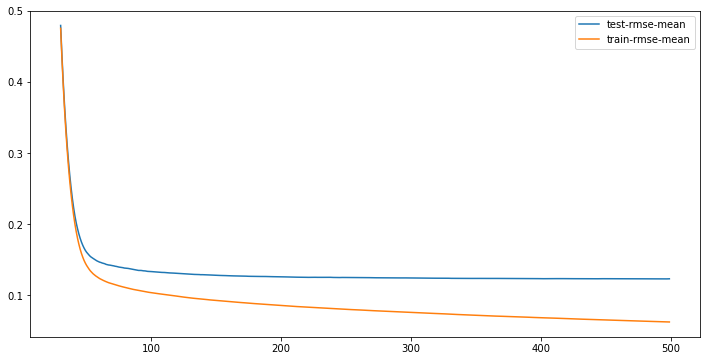

In [66]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [67]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1)
model_xgb.fit(X_train.loc[:,'MSSubClass':'SaleCondition_Partial'], y)

/Users/manvimahajan/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=360, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [68]:
model_lasso = LassoCV(alphas = [0.0005]).fit(X_train.loc[:,'MSSubClass':'SaleCondition_Partial'], y)
xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))

ValueError: Feature shape mismatch, expected: 288, got 290

In [ ]:
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

#### Using only xgb_preds, model is overfitting. On training RMSE is ~0.1, but on test it is 0.13

In [ ]:
rmse_cv(model_xgb).mean() #RMSE is improved, earlier it was 0.127

In [ ]:
preds = 0.7*lasso_preds + 0.3*xgb_preds

In [ ]:
solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
# solution.to_csv("ridge_sol.csv", index = False)

In [ ]:
solution.to_csv('submission.csv') #Score: 0.12299

## Improve upon this XGboost model

### Feature Engineering


In [69]:
all_data['GarageYrBltn'] = abs(all_data['YrSold'] - all_data['GarageYrBlt'])
all_data['YearRemodAddn'] = abs(all_data['YrSold'] - all_data['YearRemodAdd'])
all_data['YearBuiltn'] = abs(all_data['YrSold'] - all_data['YearBuilt'])
all_data['SF'] = all_data['1stFlrSF']+all_data['2ndFlrSF']+all_data['TotalBsmtSF']+all_data['GrLivArea']+all_data['HalfBath']+all_data['FullBath']

/var/folders/xk/szxzvgq138ndv5c88q9xfh1m0000gn/T/ipykernel_78305/3511061470.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data['GarageYrBltn'] = abs(all_data['YrSold'] - all_data['GarageYrBlt'])
/var/folders/xk/szxzvgq138ndv5c88q9xfh1m0000gn/T/ipykernel_78305/3511061470.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_data['YearRemodAddn'] = abs(all_data['YrSold'] - all_data['YearRemodAdd'])
/var/folders/xk/szxzvgq138ndv5c88q9xfh1m0000gn/T/ipykernel_78305/3511061470.py:3: PerformanceWarning: DataFrame is highly 

In [70]:
all_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageYrBltn,YearRemodAddn,YearBuiltn,SF
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0,0,0,0,1,0,5.000000,5,5,30.702811
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,0,0,0,0,1,0,31.000000,31,31,23.423735
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,0,0,0,0,1,0,7.000000,6,7,30.904253
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,1,0,0,0,0,0,8.000000,36,91,28.576657
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,0,0,0,0,1,0,8.000000,8,8,31.744172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5.081404,3.091042,7.568896,4,7,1970,1970,0.000000,0.000000,0.0,...,0,0,0,0,1,0,27.886594,36,36,27.910028
1455,5.081404,3.091042,7.546974,4,5,1970,1970,0.000000,5.533389,0.0,...,1,0,0,0,0,0,36.000000,36,36,27.910028
1456,3.044522,5.081404,9.903538,5,7,1960,1996,0.000000,7.110696,0.0,...,1,0,0,0,0,0,46.000000,10,46,22.332088
1457,4.454347,4.143135,9.253591,5,5,1992,1992,0.000000,5.823046,0.0,...,0,0,0,0,1,0,27.886594,14,14,21.573389


In [71]:
scaler = StandardScaler()
scaler.fit(all_data)
all_data = pd.DataFrame(scaler.transform(all_data), index = all_data.index, columns = all_data.columns)

In [72]:
all_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageYrBltn,YearRemodAddn,YearBuiltn,SF
0,0.419418,-0.020358,-0.103719,0.646183,-0.507284,1.046258,0.896833,1.219420,0.783352,-0.362698,...,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,-1.003156,-0.887271,-1.037932,1.198255
1,-1.120845,0.619103,0.146544,-0.063185,2.188279,0.154764,-0.395604,-0.801770,0.892570,-0.362698,...,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,0.047817,0.357618,-0.180699,-0.572342
2,0.419418,0.118440,0.457629,0.646183,-0.507284,0.980221,0.848965,1.146941,0.658276,-0.362698,...,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,-0.922312,-0.839391,-0.971991,1.247255
3,0.638691,-0.266348,0.136301,0.646183,-0.507284,-1.859351,-0.682812,-0.801770,0.387039,-0.362698,...,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693,-0.881890,0.597020,1.797529,0.681079
4,0.419418,0.769612,0.922662,1.355551,-0.507284,0.947203,0.753229,1.440386,0.758231,-0.362698,...,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,-0.881890,-0.743630,-0.939021,1.451561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.821276,-3.450727,-2.993401,-1.481920,1.289758,-0.043346,-0.682812,-0.801770,-1.418112,-0.362698,...,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,-0.078033,0.597020,-0.015847,0.518925
1455,1.821276,-3.450727,-3.036401,-1.481920,-0.507284,-0.043346,-0.682812,-0.801770,0.438541,-0.362698,...,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693,0.249927,0.597020,-0.015847,0.518925
1456,-1.120845,2.764091,1.586172,-0.772552,1.289758,-0.373528,0.561757,-0.801770,0.967785,-0.362698,...,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693,0.654148,-0.647869,0.313858,-0.837880
1457,0.915540,-0.165615,0.311255,-0.772552,-0.507284,0.683057,0.370284,-0.801770,0.535732,-0.362698,...,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,-0.078033,-0.456348,-0.741198,-1.022429


In [73]:
df_train = all_data.iloc[:1460,:]
df_test = all_data.iloc[1460:,:]
final = pd.concat([df_train,y], axis = 1)

In [74]:
final

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageYrBltn,YearRemodAddn,YearBuiltn,SF,SalePrice
0,0.419418,-0.020358,-0.103719,0.646183,-0.507284,1.046258,0.896833,1.219420,0.783352,-0.362698,...,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,-1.003156,-0.887271,-1.037932,1.198255,12.247699
1,-1.120845,0.619103,0.146544,-0.063185,2.188279,0.154764,-0.395604,-0.801770,0.892570,-0.362698,...,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,0.047817,0.357618,-0.180699,-0.572342,12.109016
2,0.419418,0.118440,0.457629,0.646183,-0.507284,0.980221,0.848965,1.146941,0.658276,-0.362698,...,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,-0.922312,-0.839391,-0.971991,1.247255,12.317171
3,0.638691,-0.266348,0.136301,0.646183,-0.507284,-1.859351,-0.682812,-0.801770,0.387039,-0.362698,...,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693,-0.881890,0.597020,1.797529,0.681079,11.849405
4,0.419418,0.769612,0.922662,1.355551,-0.507284,0.947203,0.753229,1.440386,0.758231,-0.362698,...,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,-0.881890,-0.743630,-0.939021,1.451561,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.419418,-0.165615,-0.231508,-0.063185,-0.507284,0.914184,0.753229,-0.801770,-1.418112,-0.362698,...,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,-0.881890,-0.791510,-0.939021,1.190896,12.072547
1456,-1.120845,0.806133,0.767440,-0.063185,0.391237,0.220801,0.178812,1.029776,0.821022,2.352645,...,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,0.088239,-0.073305,-0.147729,-0.282342,12.254868
1457,0.638691,0.026597,0.029092,0.646183,3.086800,-1.000876,1.040437,-0.801770,0.467737,-0.362698,...,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,1.583855,-0.935151,1.072179,1.255815,12.493133
1458,-1.120845,0.118440,0.170303,-0.772552,0.391237,-0.703711,0.561757,-0.801770,-0.105486,3.330965,...,-0.064249,-0.09105,-0.126535,0.463937,-0.302693,1.220056,-0.456348,0.775444,-0.930488,11.864469


In [75]:
from sklearn.linear_model import BayesianRidge, HuberRegressor, Ridge, OrthogonalMatchingPursuit
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

In [76]:
baseline_model = GradientBoostingRegressor()
baseline_model.fit(df_train, y)

GradientBoostingRegressor()

In [77]:
br_params = {
    'n_iter': 304,
    'tol': 0.16864712769300896,
    'alpha_1': 5.589616542154059e-07,
    'alpha_2': 9.799343618469923,
    'lambda_1': 1.7735725582463822,
    'lambda_2': 3.616928181181732e-06
}


ridge_params = {
    'alpha': 10
}


In [78]:
models = {'gbr':GradientBoostingRegressor(),
          'br':BayesianRidge(**br_params),
          'ridge':Ridge(**ridge_params),
          'catboost':CatBoostRegressor(loss_function='RMSE',n_estimators=15000, verbose = 0)}

In [79]:
for name, model in models.items():
    model.fit(df_train, y)

In [ ]:
results = {}

kf = KFold(n_splits=10)

for name, model in models.items():
    result = np.exp(np.sqrt(-cross_val_score(model, df_train, y, scoring='neg_mean_squared_error', cv=kf)))
    results[name] = result

In [ ]:
for name, result in results.items():
    print("----------\n" + name)
    print(np.mean(result))
    print(np.std(result))

In [ ]:
y_pred = (
    0.0 * np.exp(models['gbr'].predict(df_test)) +
    0.0 * np.exp(models['br'].predict(df_test)) +
    0.0 * np.exp(models['ridge'].predict(df_test))+
    1 * np.exp(models['catboost'].predict(df_test)))

In [ ]:
solution = pd.DataFrame({"id":test.Id, "SalePrice":y_pred})
# solution.to_csv("ridge_sol.csv", index = False)

In [100]:
solution.to_csv('submission.csv',index=False) #Score: 0.12299

NameError: name 'solution' is not defined

In [101]:
solution

NameError: name 'solution' is not defined

### Using ensemble model with some feature engineering gives us better result at public leaderboard 0.124, than by using just xgboost 0.132